In [8]:
using SymPy
using Plots

**4.4.1**

Use a lagrange interpolating polynomial to find a linear interpolating function given the bounds $x_1$ and $x_2$ where $\xi\in[-1,1]$. Since there are two points for a linear interpolation the lagrange interpolation is as follows.
$$\ell_1 = \frac{x - x_2}{x_1 - x_2}$$
$$\ell_2 = \frac{x - x_1}{x_2 - x_1}$$
The interpolating polynomial is created through linear combination:
$$\Epsilon_{j=0}^k y_j\ell_j(x)$$
For this that means that the resulting equation is when $y_1$ is -1 and $y_2$ is 1:
$$\xi = \frac{2}{x_2 - x_1}x + \frac{x_1 + x_2}{x_1 - x_2}

**4.4.2**

A similar process to the one completed above will follow for this problem. This time the $\ell$ values look like the following:
$$\ell_1 = \frac{\xi + 1}{2}$$
$$\ell_2 = \frac{\xi - 1}{2}$$
The interpolating polynomial is created through linear combination:
$$\Epsilon_{j=0}^k y_j\ell_j(x)$$
For these equations that means that the polynomial looks like:
$$\frac{\xi + 1}{2} u_1 + \frac{\xi 1 1}{2} u_2$$
After rearranging and reformating this looks like the following:
$$\begin{bmatrix} \frac{1 - \xi}{2} & \frac{1 + \xi}{2} \end{bmatrix}\begin{bmatrix}u_1\\u_2\end{bmatrix}$$
To find the coefficients, I used a SymPy to simplify and view the polynomial

In [3]:
@vars u₁ u₂ ξ
eqn = (u₁ * (1 - ξ) / 2) + (u₂ * (1 + ξ) / 2)
eqn = expand(eqn)

  u₁*ξ   u₁   u₂*ξ   u₂
- ---- + -- + ---- + --
   2     2     2     2 

Combining equal power terms leads to $A = \frac{u_2}{2} - \frac{u_1}{2}$ and $B = \frac{u_1}{2} + \frac{u_2}{2}$

**4.4.3**

For the quadratic shape function it is now more than just two points so the lagrange interpolation gains an extra term. The $\ell$s are as follows:
$$\ell_1 = \frac{\xi - \xi_2}{\xi_1 - \xi_2} \frac{\xi - \xi_3}{\xi_1 - \xi_3} = \frac{\xi - 0}{-1 - 0} \frac{\xi - 1}{-1 - 1}$$
$$\ell_2 = \frac{\xi - \xi_1}{\xi_2 - \xi_1} \frac{\xi - \xi_3}{\xi_2 - \xi_3} = \frac{\xi + 1}{0 + 1} \frac{\xi - 1}{0 - 1}$$
$$\ell_3 = \frac{\xi - \xi_1}{\xi_3 - \xi_1} \frac{\xi - \xi_2}{\xi_3 - \xi_2} = \frac{\xi + 1}{1 + 1} \frac{\xi - 0}{1 - 0}$$
Through simplification the matrix of $\ell$'s looks like:
$$\begin{bmatrix}\frac{\xi(\xi -1)}{2} & \frac{\xi(\xi + 1)}{2} & 1 - \xi^2 \end{bmatrix}$$
After adding the u's the interpolation looks like:
$$\begin{bmatrix}\frac{\xi(\xi -1)}{2} & \frac{\xi(\xi + 1)}{2} & 1 - \xi^2 \end{bmatrix} \begin{bmatrix}u_1\\u_2\\u_3\end{bmatrix}$$
Again, using SymPy, the coefficients of the equation can be solved through the following method:


In [11]:
@vars u₁ u₂ u₃ ξ
eqn = (ξ *(ξ - 1)/2) * u₁ + (ξ *(ξ + 1)/2) * u₂ + (1 - ξ^2) * u₃
eqn = expand(eqn)
display(eqn)


    2              2                    
u₁*ξ    u₁*ξ   u₂*ξ    u₂*ξ       2     
----- - ---- + ----- + ---- - u₃*ξ  + u₃
  2      2       2      2               

After collecting terms sharing the same power of $\xi$ the coefficients are as follows:
$$A = \frac{u_1}{2} + \frac{u_2}{2} - u_3$$
$$B = \frac{-u_1}{2} + \frac{u_2}{2}$$
$$C = u_3$$

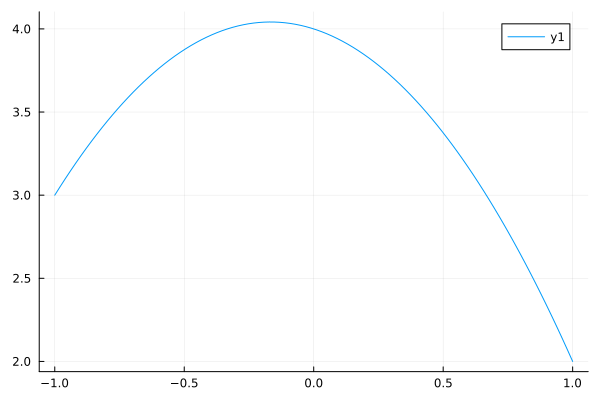

In [10]:
eqn = eqn.subs(u₁, 3)
eqn = eqn.subs(u₂, 2)
eqn = eqn.subs(u₃, 4)
x = LinRange(-1,1,100)
y = eqn.(x)
plot(x,y)